In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
# shape확인
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


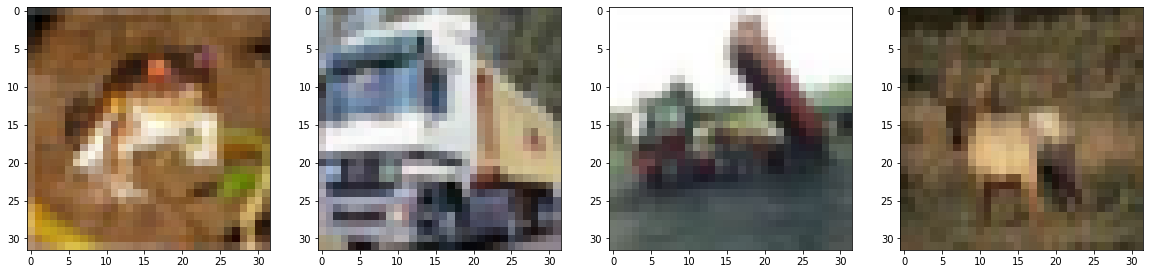

In [3]:
# 이미지 확인
plt.figure(figsize=(20, 20))
for i, img in enumerate(x_train[:4]):
    plt.subplot(1, 4, i+1)
    plt.imshow(x_train[i])
plt.show()

In [12]:
# train, test label 확인
y_train = keras.utils.to_categorical(y_train)
print(y_train[:4])
print(np.shape(y_train))
y_test = keras.utils.to_categorical(y_test)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
(50000, 10)


In [13]:
# train, test 정규화
x_train = x_train /255.0
x_test = x_test / 255.0


In [14]:
# CNN model 구현
model = keras.Sequential([
    keras.layers.Conv2D(16, 3, kernel_initializer="he_normal", activation='relu', padding="same", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, kernel_initializer="he_normal", activation='relu', padding='same'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(32, kernel_initializer="he_normal", activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
# model 요약 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [16]:
# 모델 optimizer, loss, metrics 컴파일
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics=["accuracy"]
)

In [17]:
# model 훈련 시키면서 결과를 hist에 저장
hist = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
400/400 [==============================] - 35s 85ms/step - loss: 1.7575 - accuracy: 0.3641 - val_loss: 1.4186 - val_accuracy: 0.4920
Epoch 2/10
400/400 [==============================] - 34s 86ms/step - loss: 1.3288 - accuracy: 0.5280 - val_loss: 1.2643 - val_accuracy: 0.5476
Epoch 3/10
400/400 [==============================] - 34s 86ms/step - loss: 1.2010 - accuracy: 0.5751 - val_loss: 1.2102 - val_accuracy: 0.5771
Epoch 4/10
400/400 [==============================] - 34s 86ms/step - loss: 1.1159 - accuracy: 0.6074 - val_loss: 1.1170 - val_accuracy: 0.6100
Epoch 5/10
400/400 [==============================] - 34s 86ms/step - loss: 1.0649 - accuracy: 0.6271 - val_loss: 1.0807 - val_accuracy: 0.6283
Epoch 6/10
400/400 [==============================] - 35s 86ms/step - loss: 1.0138 - accuracy: 0.6460 - val_loss: 1.0892 - val_accuracy: 0.6186
Epoch 7/10
400/400 [==============================] - 35s 87ms/step - loss: 0.9814 - accuracy: 0.6598 - val_loss: 1.0665 - val_accuracy:

In [18]:
# test로 평가하여 loss와 acc 저장
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.0289 - accuracy: 0.6520


In [26]:
# 잘 예측 했는지 확인
print(model.predict(x_test[101:102]))
print(y_test[101])

[[1.6639063e-03 3.4858749e-05 7.8970410e-02 3.6823025e-01 1.1910054e-01
  3.4502155e-01 4.2831652e-02 3.3929501e-02 9.3276864e-03 8.8954682e-04]]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
